In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip
!unzip PAMAP2_Dataset.zip

--2024-02-13 09:35:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘PAMAP2_Dataset.zip’

PAMAP2_Dataset.zip      [     <=>            ] 656.29M   602KB/s    in 13m 18s 

2024-02-13 09:48:32 (842 KB/s) - ‘PAMAP2_Dataset.zip’ saved [688167640]

Archive:  PAMAP2_Dataset.zip
  inflating: PAMAP2_Dataset/Protocol/subject101.dat  
  inflating: PAMAP2_Dataset/Protocol/subject102.dat  
  inflating: PAMAP2_Dataset/Protocol/subject103.dat  
  inflating: PAMAP2_Dataset/Protocol/subject104.dat  
  inflating: PAMAP2_Dataset/Protocol/subject105.dat  
  inflating: PAMAP2_Dataset/Protocol/subject106.dat  
  inflating: PAMAP2_Dataset/Protocol/subject107.dat  
  inflating: PAMAP2_Dataset/Protocol/subject108.dat  
  inflating: PAMA

In [ ]:
import pandas as pd
import os

# Path to the directory containing the dataset
dataset_path = "PAMAP2_Dataset"

# List all files in the Protocol folder
protocol_files = os.listdir(os.path.join(dataset_path, "Protocol"))

# Let's read one of the data files to understand its structure
sample_data_file = os.path.join(dataset_path, "Protocol", protocol_files[0])
sample_df = pd.read_csv(sample_data_file, header=None, delim_whitespace=True)

# Display the first few rows of the sample dataframe
print("Sample Data File:", sample_data_file)
print("Sample Dataframe:")
print(sample_df.head())

# Explore other files and their contents similarly...


Sample Data File: PAMAP2_Dataset/Protocol/subject108.dat
Sample Dataframe:
     0   1   2        3        4        5         6        7        8   \
0  5.89   0 NaN  33.3125 -9.79760 -1.45670  1.014380 -9.70702 -1.60337   
1  5.90   0 NaN  33.3125 -9.91204 -1.41822  0.974050 -9.78262 -1.60285   
2  5.91   0 NaN  33.3125 -9.87531 -1.57027  0.975113 -9.78237 -1.57265   
3  5.92   0 NaN  33.3125 -9.72175 -1.60870  1.054520 -9.70677 -1.60334   
4  5.93   0 NaN  33.3125 -9.79920 -1.49497  0.975999 -9.58657 -1.57408   

        9   ...        44        45        46       47       48       49  \
0  1.32098  ... -0.013731  0.010364  0.010731 -35.4550  38.3829 -17.9083   
1  1.29085  ...  0.004436 -0.005926 -0.006704 -35.4508  38.2543 -17.7663   
2  1.29079  ...  0.022508 -0.002265  0.014646 -35.6984  38.2688 -17.0580   
3  1.35118  ... -0.006964  0.035314  0.010982 -34.9492  38.7447 -17.6233   
4  1.27549  ... -0.015835 -0.001065 -0.000410 -35.2105  38.8857 -17.9080   

         50        51  

In [ ]:
def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map

In [ ]:
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output

def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output


def load_subjects(root='PAMAP2_Dataset/Protocol/subject'):
    output = []
    cols = load_IMU()

    for i in range(101, 110):
        path = f"{root}{i}.dat"
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols
        subject['id'] = i
        output.append(subject)

    output = pd.concat(output, ignore_index=True)
    return output

data = load_subjects()




'''
def load_subjects(root='../input/ass2-time-series/PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()

    for i in range(101,110):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols
        subject['id'] = i
        output = output.append(subject, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()'''

"\ndef load_subjects(root='../input/ass2-time-series/PAMAP2_Dataset/Protocol/subject'):\n    output = pd.DataFrame()\n    cols = load_IMU()\n\n    for i in range(101,110):\n        path = root + str(i) +'.dat'\n        subject = pd.read_table(path, header=None, sep='\\s+')\n        subject.columns = cols\n        subject['id'] = i\n        output = output.append(subject, ignore_index=True)\n    output.reset_index(drop=True, inplace=True)\n    return output\n\ndata = load_subjects()"

In [ ]:
data

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,101
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109


In [ ]:
import numpy as np

# Replace NaN values with mean of the respective columns
data_filled = data.fillna(data.mean())

# Filter out rows where activity_id = 0
data_filtered = data_filled[data_filled['activity_id'] != 0]

# Reset index
data_filtered.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(data_filtered)


         time_stamp  activity_id  heart_rate  hand_temperature  \
0             37.66            1  109.872508            30.375   
1             37.67            1  109.872508            30.375   
2             37.68            1  109.872508            30.375   
3             37.69            1  109.872508            30.375   
4             37.70            1  100.000000            30.375   
...             ...          ...         ...               ...   
1942867       95.06           24  109.872508            25.125   
1942868       95.07           24  109.872508            25.125   
1942869       95.08           24  109.872508            25.125   
1942870       95.09           24  162.000000            25.125   
1942871       95.10           24  109.872508            25.125   

         hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
0                          2.21530                    8.27915   
1                          2.29196                    7.67288   
2           

In [ ]:
data.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,...,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,...,-3.450122e-02,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,1.045005e+02
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,...,5.966026e-01,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685818e-01,-8.933270e+00,1.284680e+00,1.164040e+00,...,-8.267093e-02,-3.084595e-01,-4.289480e+01,-1.148540e+01,3.289348e+00,1.563440e-01,-5.839910e-01,1.087023e-02,-5.047580e-01,1.020000e+02
50%,1.790830e+03,3.000000e+00,108.000000,3.312500e+01,-5.788145e+00,3.570830e+00,2.958415e+00,-5.737615e+00,3.613430e+00,3.132855e+00,...,-4.249850e-03,-2.216015e-03,-3.390020e+01,1.362615e+00,1.809105e+01,3.197555e-01,0.000000e+00,3.043820e-01,0.000000e+00,1.050000e+02
75%,2.710570e+03,7.000000e+00,125.000000,3.400000e+01,-7.829420e-01,6.602720e+00,6.002930e+00,-7.249920e-01,6.601960e+00,6.257612e+00,...,8.296868e-02,6.343258e-02,-1.905920e+01,1.733090e+01,3.087820e+01,5.794420e-01,6.279450e-01,6.020032e-01,4.634432e-01,1.070000e+02
max,4.475630e+03,2.400000e+01,202.000000,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.194460e+01,...,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.923540e-01,9.961050e-01,1.090000e+02


In [ ]:
data_filtered.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.096530e+02,3.275692e+01,-4.938440e+00,3.580350e+00,3.606822e+00,-4.871169e+00,3.569175e+00,3.791488e+00,...,-3.675718e-02,7.725923e-03,-3.157362e+01,1.415494e+00,1.724135e+01,3.811939e-01,-8.991595e-03,3.022460e-01,-5.708981e-02,1.045664e+02
std,1.093463e+03,6.174789e+00,8.181409e+00,1.786863e+00,6.213279e+00,6.868160e+00,3.948962e+00,6.219223e+00,6.567391e+00,3.935159e+00,...,6.366806e-01,2.007497e+00,1.831619e+01,2.164097e+01,1.967851e+01,3.030430e-01,5.701276e-01,3.321019e-01,4.791305e-01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,7.445400e+02,3.000000e+00,1.098725e+02,3.168750e+01,-8.945350e+00,1.073657e+00,1.174748e+00,-8.842695e+00,1.073090e+00,1.378238e+00,...,-1.045550e-01,-4.295000e-01,-4.166590e+01,-1.234500e+01,3.856965e+00,1.431020e-01,-6.113393e-01,5.498502e-03,-5.369030e-01,1.020000e+02
50%,1.480330e+03,6.000000e+00,1.098725e+02,3.312500e+01,-5.382190e+00,3.552220e+00,3.409340e+00,-5.304210e+00,3.584267e+00,3.642290e+00,...,-4.350100e-03,-1.951540e-03,-3.388210e+01,9.251920e-01,1.861900e+01,2.847090e-01,0.000000e+00,3.070030e-01,0.000000e+00,1.050000e+02
75%,2.663610e+03,1.300000e+01,1.098725e+02,3.406250e+01,-9.786613e-01,6.431750e+00,6.530193e+00,-9.260655e-01,6.442353e+00,6.775690e+00,...,1.137142e-01,8.955562e-02,-1.792845e+01,1.778380e+01,3.115002e+01,5.589960e-01,6.130020e-01,5.949153e-01,4.360202e-01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.514820e-01,9.961050e-01,1.090000e+02


In [ ]:
print('Size of the data: ', data.size)
print('Shape of the data: ', data.shape)
print('Number of columns in the data: ', len(data.columns))
result_id = data.groupby(['id']).mean().reset_index()
print('Number of uniqe ids in the data: ', len(result_id))
result_act = data.groupby(['activity_id']).mean().reset_index()
print('Numbe of uniqe activitys in the data: ',len(result_act))

Size of the data:  157989315
Shape of the data:  (2872533, 55)
Number of columns in the data:  55
Number of uniqe ids in the data:  9
Numbe of uniqe activitys in the data:  13


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def create_sliding_window(data_filtered, window_size):
    X = []
    y = []
    for i in range(len(data_filtered) - window_size):
        X.append(data_filtered[i:i+window_size])
        y.append(data_filtered.iloc[i+window_size])  # Accessing data using iloc to avoid KeyError
    return np.array(X), np.array(y)

def split_train_test(data_filtered):
    # create the test data
    subject107 = data_filtered[data_filtered['id'] == 107]
    subject108 = data_filtered[data_filtered['id'] == 108]
    test = pd.concat([subject107, subject108])

    # create the train data
    train = data_filtered[data_filtered['id'] != 107]
    train = train[train['id'] != 108]  # Correcting the filtering for subject 108

    # drop the columns id and time
    test = test.drop(["id"], axis=1)
    train = train.drop(["id"], axis=1)

    # split train and test to X and y
    X_train = train.drop(['activity_id','time_stamp'], axis=1).values
    X_test = test.drop(['activity_id','time_stamp'], axis=1).values

    # make data scale to min max between 0 to 1
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train)
    min_max_scaler.fit(X_test)
    X_train = min_max_scaler.transform(X_train)
    X_test = min_max_scaler.transform(X_test)

    y_train = train['activity_id'].values
    y_test = test['activity_id'].values
    return X_train, X_test, y_train, y_test

# Example usage
X_train, X_test, y_train, y_test = split_train_test(data_filtered)
print('Train shape X :', X_train.shape, ' y ', y_train.shape)
print('Test shape X :', X_test.shape, ' y ', y_test.shape)


Train shape X : (1447994, 52)  y  (1447994,)
Test shape X : (494878, 52)  y  (494878,)


In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout

In [ ]:
#Actual One
def create_lstm_data(X, y, step_back = 5, step_forword = 1):
    out_X = []
    out_y = []
    size = len(X)
    for i, features in enumerate(X):
        if i >= step_back and i < size - step_forword:
            tmp_X = []
            tmp_y = []
            for j in range(i-step_back,i):
                tmp_X.extend([X[j]])
            out_X.append(tmp_X)
            for j in range(i,i+step_forword):
                tmp_y.extend([y[j]])
            out_y.append(tmp_y)
    return np.array(out_X), np.array(out_y)

X_lstm_train, y_lstm_train = create_lstm_data(X_train, y_train)
X_lstm_test, y_lstm_test = create_lstm_data(X_test, y_test)
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder(handle_unknown='ignore',sparse = False)
hot.fit(y_lstm_train)
hot.fit(y_lstm_test)

y_lstm_train = hot.transform(y_lstm_train)
y_lstm_test = hot.transform(y_lstm_test)
print('Train shape X lstm :',X_lstm_train.shape,' y ', y_lstm_train.shape)
print('Test shape X lstm :',X_lstm_test.shape,' y ', y_lstm_test.shape)

Train shape X lstm : (1447988, 5, 52)  y  (1447988, 12)
Test shape X lstm : (494872, 5, 52)  y  (494872, 12)


/home/dllab-1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/dllab-1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(6,input_shape=(X_lstm_train.shape[1],X_lstm_train.shape[2])))
lstm_model.add(Dense(16 ,activation='relu'))
lstm_model.add(Dense(y_lstm_train.shape[1], activation='softmax'))

lstm_model.summary()
lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

2024-02-28 17:23:06.191353: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dllab-1/catkin_ws/devel/lib:/opt/ros/melodic/lib:/usr/local/cuda-10.1/lib64:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins
2024-02-28 17:23:06.191994: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 1416      
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
Total params: 1,732
Trainable params: 1,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=10)
history = lstm_model.fit(X_lstm_train, y_lstm_train, validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])

# from keras.callbacks import EarlyStopping
# early_stopping_monitor = EarlyStopping(patience=3)
# history = lstm_model.fit(X_lstm_train, y_lstm_train, validation_split = 0.2 , epochs = 10, callbacks=[early_stopping_monitor])




2024-02-28 17:23:31.817146: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1204725600 exceeds 10% of free system memory.


Epoch 1/10
36200/36200 [==============================] - 105s 3ms/step - loss: 0.4877 - accuracy: 0.8351 - val_loss: 4.0582 - val_accuracy: 0.4838
Epoch 2/10
36200/36200 [==============================] - 101s 3ms/step - loss: 0.2350 - accuracy: 0.9235 - val_loss: 5.6675 - val_accuracy: 0.5133
Epoch 3/10
36200/36200 [==============================] - 101s 3ms/step - loss: 0.1798 - accuracy: 0.9412 - val_loss: 6.9278 - val_accuracy: 0.4966
Epoch 4/10
36200/36200 [==============================] - 101s 3ms/step - loss: 0.1528 - accuracy: 0.9501 - val_loss: 7.9613 - val_accuracy: 0.4706
Epoch 5/10
36200/36200 [==============================] - 103s 3ms/step - loss: 0.1358 - accuracy: 0.9559 - val_loss: 9.0630 - val_accuracy: 0.4574
Epoch 6/10
36200/36200 [==============================] - 102s 3ms/step - loss: 0.1243 - accuracy: 0.9598 - val_loss: 10.1332 - val_accuracy: 0.4648
Epoch 7/10
36200/36200 [==============================] - 103s 3ms/step - loss: 0.1163 - accuracy: 0.9628 - val

In [ ]:
from sklearn.metrics import accuracy_score

y = y_test[5:-1]
preds = lstm_model.predict(X_lstm_test)
preds_cat = np.argmax(preds,axis=1)
# building a map of result to activity
result = np.unique(preds_cat).tolist()
expected = np.unique(y).tolist()
combined = list(zip(result,expected))
conf_map = dict(combined)
# transfoms the prediction to an activity
# results = [conf_map[x] for x in preds_cat]
# print('model accuracy on test :',accuracy_score(y,results)*100)
default_activity = "unknown"
conf_map.update({x: default_activity for x in range(len(result)) if x not in conf_map})

# Transforms the prediction to an activity
results = [conf_map.get(x, default_activity) for x in preds_cat]

print('model accuracy on test:', accuracy_score(y, results) * 100)

model accuracy on test: 31.891883153623564


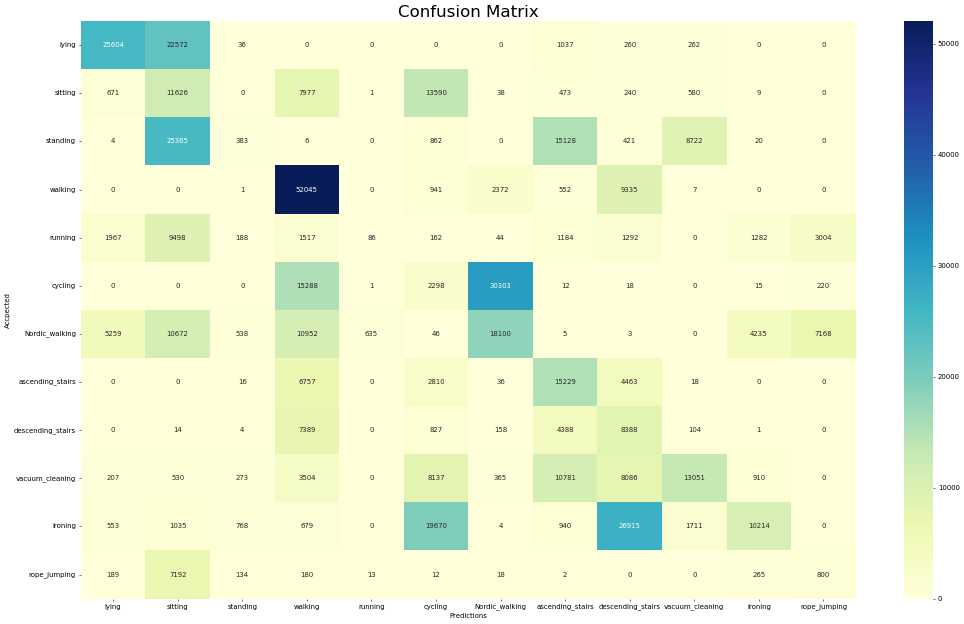

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def quick_plot_con_matrix(y, results,labels):
    # now print confusion metrix
    con = confusion_matrix(y,results)
    a = plt.figure(figsize=(25,15), dpi=50)
    a = sns.heatmap(con, cmap='YlGnBu', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
    a = plt.rcParams.update({'font.size': 20})
    a = plt.title('Confusion Matrix')
    a = plt.xlabel('Predictions')
    a = plt.ylabel('Accpected')

activity_map = load_activity_map()
labels = [activity_map[conf_map[x]] for x in result]
quick_plot_con_matrix(y,results, labels)

In [ ]:
def split_train_test(data):
    # create the test data
    subject107 = data[data['id'] == 107]
    subject108 = data[data['id'] == 108]
    test = subject107.append(subject108)

    # create the train data
    train = data[data['id'] != 107]
    train = data[data['id'] != 108]

    # drop the columns id and time
    test = test.drop(["id"], axis=1)
    train = train.drop(["id"], axis=1)

    # split train and test to X and y
    X_train = train.drop(['activity_id','time_stamp'], axis=1).values
    X_test = test.drop(['activity_id','time_stamp'], axis=1).values

    # make data scale to min max beetwin 0 to 1
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train)
    min_max_scaler.fit(X_test)
    X_train = min_max_scaler.transform(X_train)
    X_test = min_max_scaler.transform(X_test)

    y_train = train['activity_id'].values
    y_test = test['activity_id'].values
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(data)
print('Train shape X :',X_train.shape,' y ', y_train.shape)
print('Test shape X :',X_test.shape,' y ', y_test.shape)

/tmp/ipykernel_3626/3146401294.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = subject107.append(subject108)


Train shape X : (2464502, 52)  y  (2464502,)
Test shape X : (721630, 52)  y  (721630,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def base_line_preprocess(data):
    train = data.groupby('activity_id')
    X_base = train.mean().reset_index().drop(['activity_id','id','time_stamp'],axis=1).values
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_base)
    X_base = min_max_scaler.transform(X_base)
    y_base = np.array(train['activity_id'].unique().explode().values).astype('float64')
    return X_base, y_base

X_base, y_base = base_line_preprocess(data)
print('X base shape: ', X_base.shape)
print('y base shape: ', y_base.shape)



X base shape:  (13, 52)
y base shape:  (13,)


In [ ]:
def create_lstm_data(X, y, step_back = 5, step_forword = 1):
    out_X = []
    out_y = []
    size = len(X)
    for i, features in enumerate(X):
        if i >= step_back and i < size - step_forword:
            tmp_X = []
            tmp_y = []
            for j in range(i-step_back,i):
                tmp_X.extend([X[j]])
            out_X.append(tmp_X)
            for j in range(i,i+step_forword):
                tmp_y.extend([y[j]])
            out_y.append(tmp_y)
    return np.array(out_X), np.array(out_y)

X_lstm_train, y_lstm_train = create_lstm_data(X_train, y_train)
X_lstm_test, y_lstm_test = create_lstm_data(X_test, y_test)


In [ ]:
new_data = data.copy().reset_index()
# new_data = new_data.drop('index',axis=1)
# new_data = new_data.reset_index()
new_cols = None
for subject in range(101,110):
    prev_act_1 = new_data[new_data['id'] == subject]
    start = prev_act_1.head(2).index[1]
    end = prev_act_1.tail(1).index[0]
    prev_act_1 = prev_act_1.loc[start:end+1]
    new_cols_1 = pd.DataFrame()
    new_cols_1['prev_aid'] = prev_act_1['activity_id']
    new_cols_1['prev_hr'] = prev_act_1['heart_rate']
    new_cols_1['index'] = prev_act_1['index'] + 1
    if new_cols is None:
        new_cols = new_cols_1
    else:
        new_cols = new_cols.append(new_cols_1)
new_cols = new_data.merge(new_cols, on='index', how='left')
new_cols = new_cols.dropna()


/tmp/ipykernel_18062/3938450002.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cols = new_cols.append(new_cols_1)
/tmp/ipykernel_18062/3938450002.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cols = new_cols.append(new_cols_1)
/tmp/ipykernel_18062/3938450002.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cols = new_cols.append(new_cols_1)
/tmp/ipykernel_18062/3938450002.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cols = new_cols.append(new_cols_1)
/tmp/ipykernel_18062/3938450002.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [ ]:
new_data = data_filtered.copy().reset_index()
new_cols = None
for subject in range(101, 110):
    prev_act_1 = new_data[new_data['id'] == subject]
    start = prev_act_1.head(2).index[1]
    end = prev_act_1.tail(1).index[0]
    prev_act_1 = prev_act_1.loc[start:end+1]
    print("Subject:", subject)
    print("prev_act_1 shape:", prev_act_1.shape)
    print("prev_act_1 data:", prev_act_1.head())

    new_cols_1 = pd.DataFrame()
    new_cols_1['prev_aid'] = prev_act_1['activity_id']
    new_cols_1['prev_hr'] = prev_act_1['heart_rate']
    new_cols_1['index'] = prev_act_1['index'] + 1
    print("new_cols_1 shape:", new_cols_1.shape)
    print("new_cols_1 data:", new_cols_1.head())

    if new_cols is None:
        new_cols = new_cols_1
    else:
        new_cols = pd.concat([new_cols, new_cols_1], ignore_index=True)
#         new_cols = new_cols.append(new_cols_1)


print("new_cols shape before merging:", new_cols.shape)
new_data = new_data.merge(new_cols, on='index', how='left')
new_data = new_data.dropna()
print("new_data shape after merging and dropping NA values:", new_data.shape)

Subject: 101
prev_act_1 shape: (249956, 56)
prev_act_1 data:    index  time_stamp  activity_id  heart_rate  hand_temperature  \
1      1       37.67            1  109.872508            30.375   
2      2       37.68            1  109.872508            30.375   
3      3       37.69            1  109.872508            30.375   
4      4       37.70            1  100.000000            30.375   
5      5       37.71            1  109.872508            30.375   

   hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
1                    2.29196                    7.67288   
2                    2.29090                    7.14240   
3                    2.21800                    7.14365   
4                    2.30106                    7.25857   
5                    2.07165                    7.25965   

   hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
1                    5.74467                   2.27373   
2                    5.82342                   2.26966   
3      

new_cols_1 shape: (231420, 3)
new_cols_1 data:         prev_aid     prev_hr   index
687645         1  109.872508  687646
687646         1  109.872508  687647
687647         1  109.872508  687648
687648         1  109.872508  687649
687649         1  109.872508  687650
Subject: 105
prev_act_1 shape: (272441, 56)
prev_act_1 data:          index  time_stamp  activity_id  heart_rate  hand_temperature  \
919066  919066      104.51            1  109.872508           34.6875   
919067  919067      104.52            1  109.872508           34.6875   
919068  919068      104.53            1  109.872508           34.6875   
919069  919069      104.54            1  109.872508           34.6875   
919070  919070      104.55            1   98.000000           34.6875   

        hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
919066                   -8.77219                    3.17667   
919067                   -9.11203                    3.02787   
919068                   -8.95953      

Subject: 108
prev_act_1 shape: (262101, 56)
prev_act_1 data:            index  time_stamp  activity_id  heart_rate  hand_temperature  \
1674380  1674380       67.37            1  109.872508           33.8125   
1674381  1674381       67.38            1  109.872508           33.8125   
1674382  1674382       67.39            1  109.872508           33.8125   
1674383  1674383       67.40            1  109.872508           33.8125   
1674384  1674384       67.41            1  109.872508           33.8125   

         hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
1674380                   -9.80348                   -1.72328   
1674381                   -9.65232                   -1.53509   
1674382                   -9.65045                   -1.64823   
1674383                   -9.54564                   -1.53764   
1674384                   -9.50544                   -1.57520   

         hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
1674380                   0.89973

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = split_train_test(new_data)
print('Train shape X :',X_train.shape,' y ', y_train.shape)
print('Test shape X :',X_test.shape,' y ', y_test.shape)

X_lstm_train, y_lstm_train = create_lstm_data(X_train, y_train)
X_lstm_test, y_lstm_test = create_lstm_data(X_test, y_test)
hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
hot.fit(y_lstm_train)
hot.fit(y_lstm_test)

y_lstm_train = hot.transform(y_lstm_train)
y_lstm_test = hot.transform(y_lstm_test)
print('Train shape X lstm :',X_lstm_train.shape,' y ', y_lstm_train.shape)
print('Test shape X lstm :',X_lstm_test.shape,' y ', y_lstm_test.shape)

/tmp/ipykernel_3626/3146401294.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = subject107.append(subject108)


Train shape X : (1680761, 55)  y  (1680761,)
Test shape X : (494876, 55)  y  (494876,)
Train shape X lstm : (1680755, 5, 55)  y  (1680755, 12)
Test shape X lstm : (494870, 5, 55)  y  (494870, 12)


/home/dllab-1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/dllab-1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout
lstm_model = Sequential()
lstm_model.add(LSTM(16,input_shape=(X_lstm_train.shape[1],X_lstm_train.shape[2])))
lstm_model.add(Dense(64 ,activation='relu'))
lstm_model.add(Dense(64 ,activation='relu'))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(64 ,activation='relu'))
lstm_model.add(Dense(64 ,activation='relu'))
lstm_model.add(Dense(y_lstm_train.shape[1], activation='softmax'))

lstm_model.summary()
lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


2024-02-29 16:57:33.538183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dllab-1/catkin_ws/devel/lib:/opt/ros/melodic/lib:/usr/local/cuda-10.1/lib64:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins
2024-02-29 16:57:33.591567: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                4608      
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 12)                7

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=100)
history = lstm_model.fit(X_lstm_train, y_lstm_train, validation_split = 0.2 , epochs = 100, callbacks=[early_stopping_monitor])

Epoch 1/100
42019/42019 [==============================] - 133s 3ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.8779 - val_accuracy: 0.8913
Epoch 2/100
42019/42019 [==============================] - 133s 3ms/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 2.9898 - val_accuracy: 0.8815
Epoch 3/100
42019/42019 [==============================] - 129s 3ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 2.4497 - val_accuracy: 0.8375
Epoch 4/100
42019/42019 [==============================] - 131s 3ms/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 2.9183 - val_accuracy: 0.8195
Epoch 5/100
42019/42019 [==============================] - 131s 3ms/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 3.1304 - val_accuracy: 0.8093
Epoch 6/100
42019/42019 [==============================] - 131s 3ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.4692 - val_accuracy: 0.9155
Epoch 7/100
42019/42019 [==============================] - 129s 3ms/step - loss: 0.0056 - accuracy: 0.9991

In [ ]:
from sklearn.metrics import accuracy_score
y = y_test[5:-1]
preds = lstm_model.predict(X_lstm_test)
preds_cat = np.argmax(preds,axis=1)
# building a map of result to activity
result = np.unique(preds_cat).tolist()
expected = np.unique(y).tolist()
combined = list(zip(result,expected))
conf_map = dict(combined)
# transfoms the prediction to an activity
results = [conf_map[x] for x in preds_cat]
print('model accuracy on test :',accuracy_score(y,results)*100)

model accuracy on test : 97.56259219593024


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Scale the input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

# One-hot encode the output data
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()

# Reshape the input data for RNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test.shape[1], X_test.shape[2]))

# Define the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
rnn_model.add(SimpleRNN(units=50, return_sequences=True))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(units=y_train_encoded.shape[1], activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_reshaped, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
loss, accuracy = rnn_model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
52524/52524 [==============================] - 1196s 23ms/step - loss: 0.0671 - accuracy: 0.9784 - val_loss: 2.1780 - val_accuracy: 0.6218
Epoch 2/100
52524/52524 [==============================] - 1194s 23ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.5294 - val_accuracy: 0.8919
Epoch 3/100
52524/52524 [==============================] - 1194s 23ms/step - loss: 0.0164 - accuracy: 0.9955 - val_loss: 0.9746 - val_accuracy: 0.8624
Epoch 4/100
52524/52524 [==============================] - 1194s 23ms/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.7441 - val_accuracy: 0.8812
Epoch 5/100
52524/52524 [==============================] - 1194s 23ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 1.1034 - val_accuracy: 0.8904
Epoch 6/100
52524/52524 [==============================] - 1194s 23ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.7484 - val_accuracy: 0.8912
Epoch 7/100
52524/52524 [==============================] - 1194s 23ms/step - loss: 0.0083 - ac

Epoch 55/100
52524/52524 [==============================] - 1194s 23ms/step - loss: 0.0311 - accuracy: 0.9920 - val_loss: 0.8728 - val_accuracy: 0.8887
Epoch 56/100
52524/52524 [==============================] - 1195s 23ms/step - loss: 0.0455 - accuracy: 0.9871 - val_loss: 0.2000 - val_accuracy: 0.9330
Epoch 57/100
52524/52524 [==============================] - 1195s 23ms/step - loss: 0.0397 - accuracy: 0.9885 - val_loss: 0.9954 - val_accuracy: 0.8806
Epoch 58/100
52524/52524 [==============================] - 1195s 23ms/step - loss: 0.0226 - accuracy: 0.9944 - val_loss: 1.1766 - val_accuracy: 0.8807
Epoch 59/100
52524/52524 [==============================] - 1195s 23ms/step - loss: 0.0254 - accuracy: 0.9934 - val_loss: 1.0437 - val_accuracy: 0.9011
Epoch 60/100
52524/52524 [==============================] - 1195s 23ms/step - loss: 0.0283 - accuracy: 0.9927 - val_loss: 0.8774 - val_accuracy: 0.9028
Epoch 61/100
52524/52524 [==============================] - 1195s 23ms/step - loss: 0.03

# cnn

In [ ]:
#CNN
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D, Flatten, Dense


def create_dataset(new_data, window_size):
    X = []
    y = []
    for i in range(len(new_data) - window_size):
        X.append(new_data[i:i+window_size])
        y.append(new_data[i+window_size])
    return np.array(X), np.array(y)


window_size = 10

train_data, test_data = train_test_split(new_data, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.drop(columns=['activity_id', 'id']))
test_scaled = scaler.transform(test_data.drop(columns=['activity_id', 'id']))

X_train, y_train = create_dataset(train_scaled, window_size)
X_test, y_test = create_dataset(test_scaled, window_size)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))



cnn_model = Sequential()
cnn_model.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))

cnn_model.compile(optimizer='adam', loss='mse')

cnn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

loss = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", loss)

2024-03-04 11:09:48.604156: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dllab-1/catkin_ws/devel/lib:/opt/ros/melodic/lib:/usr/local/cuda-10.1/lib64:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins
2024-03-04 11:09:48.668298: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-03-04 11:09:49.752040: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3481584960 exceeds 10% of free system memory.


Epoch 1/100
97143/97143 [==============================] - 114s 1ms/step - loss: 0.0306 - val_loss: 0.0306
Epoch 2/100
97143/97143 [==============================] - 109s 1ms/step - loss: 0.0306 - val_loss: 0.0305
Epoch 3/100
97143/97143 [==============================] - 112s 1ms/step - loss: 0.0306 - val_loss: 0.0305
Epoch 4/100
97143/97143 [==============================] - 111s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 5/100
97143/97143 [==============================] - 109s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 6/100
97143/97143 [==============================] - 110s 1ms/step - loss: 0.0305 - val_loss: 0.0306
Epoch 7/100
97143/97143 [==============================] - 112s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 8/100
97143/97143 [==============================] - 111s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 9/100
97143/97143 [==============================] - 110s 1ms/step - loss: 0.0305 - val_loss: 0.0306
Epoch 10/100
97143/97143 [===========

Epoch 77/100
97143/97143 [==============================] - 108s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 78/100
97143/97143 [==============================] - 108s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 79/100
97143/97143 [==============================] - 108s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 80/100
97143/97143 [==============================] - 109s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 81/100
97143/97143 [==============================] - 108s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 82/100
97143/97143 [==============================] - 108s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 83/100
97143/97143 [==============================] - 108s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 84/100
97143/97143 [==============================] - 108s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 85/100
97143/97143 [==============================] - 108s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 86/100
97143/97143 [==

In [ ]:
#rough
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D, Flatten, Dense


def create_dataset(new_data, window_size):
    X = []
    y = []
    for i in range(len(new_data) - window_size):
        X.append(new_data[i:i+window_size])
        y.append(new_data[i+window_size])
    return np.array(X), np.array(y)


window_size = 10

train_data, test_data = train_test_split(new_data, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.drop(columns=['activity_id', 'id']))
test_scaled = scaler.transform(test_data.drop(columns=['activity_id', 'id']))

X_train, y_train = create_dataset(train_scaled, window_size)
X_test, y_test = create_dataset(test_scaled, window_size)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))



model = Sequential()
model.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

loss,accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Accuracy:",accuracy)

2024-02-29 11:17:27.255288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dllab-1/catkin_ws/devel/lib:/opt/ros/melodic/lib:/usr/local/cuda-10.1/lib64:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins
2024-02-29 11:17:27.319088: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-02-29 11:17:28.363677: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3481584960 exceeds 10% of free system memory.


Epoch 1/10


ValueError: in user code:

    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 56) and (None, 1) are incompatible


In [ ]:
# Modify the output layer to output probabilities for each class
num_classes = 6  # Assuming you have 6 classes for human activity recognition
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


2024-02-29 10:57:02.324377: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3481584960 exceeds 10% of free system memory.


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/home/dllab-1/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/dllab-1/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/dllab-1/anaconda3/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/dllab-1/anaconda3/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/home/dllab-1/anaconda3/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_18062/516457990.py", line 9, in <module>
      model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/dllab-1/anaconda3/lib/python3.10/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [16,6] and labels shape [896]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2042854]

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2298021, 5, 54)
(574502, 5, 54)


**RNN**

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (1447994, 52)
X_test shape: (494878, 52)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [ ]:


# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


2024-02-21 11:53:30.698145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dllab-1/catkin_ws/devel/lib:/opt/ros/melodic/lib:/usr/local/cuda-10.1/lib64:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins:/usr/lib/x86_64-linux-gnu/gazebo-9/plugins
2024-02-21 11:53:30.724498: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-02-21 11:53:31.403507: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301182752 exceeds 10% of free system memory.


Epoch 1/10
45250/45250 [==============================] - 955s 21ms/step - loss: 5.3613 - val_loss: 25.4255
Epoch 2/10
45250/45250 [==============================] - 951s 21ms/step - loss: 4.7536 - val_loss: 25.0735
Epoch 3/10
45250/45250 [==============================] - 944s 21ms/step - loss: 5.8386 - val_loss: 22.8554
Epoch 4/10
45250/45250 [==============================] - 944s 21ms/step - loss: 6.7999 - val_loss: 22.5687
Epoch 5/10
45250/45250 [==============================] - 944s 21ms/step - loss: 5.8991 - val_loss: 21.6843
Epoch 6/10
45250/45250 [==============================] - 944s 21ms/step - loss: 8.9983 - val_loss: 28.2216
Epoch 7/10
45250/45250 [==============================] - 944s 21ms/step - loss: 15.5806 - val_loss: 29.3588
Epoch 8/10
45250/45250 [==============================] - 944s 21ms/step - loss: 9.8988 - val_loss: 31.4085
Epoch 9/10
45250/45250 [==============================] - 944s 21ms/step - loss: 9.5909 - val_loss: 33.7142
Epoch 10/10
15465/15465 [==

In [ ]:
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean)**2)
ss_res = np.sum((y_test - y_pred.flatten())**2)
r_squared = 1 - (ss_res / ss_total)

print("R-squared:", r_squared)


R-squared: 0.22585284747583878
